<a href="https://colab.research.google.com/github/lucasmoore2k/Back-End-Projects/blob/master/Aula3_FilmexExploracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')

In [9]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [12]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [14]:
##Explorando dados : Quantos filmes o diretor fez?
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Sidney J. Furie      1
Eric Schaeffer       1
Tom Ford             1
John Putch           1
Scott Smith          1
Name: director_name, Length: 2398, dtype: int64

In [15]:
##Analisado a quantidade de criticas
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

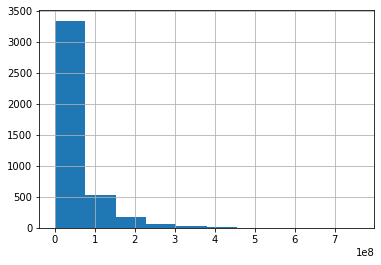

In [16]:
##Faturamento
imdb['gross'].hist()

In [19]:
##Pegando filmes aleatórios 
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
413,Color,Neil Burger,459.0,139.0,168.0,1000.0,Theo James,14000.0,150832203.0,Adventure|Mystery|Sci-Fi,Kate Winslet,Divergent,341058,22226,Mekhi Phifer,2.0,army|brother sister relationship|dystopia|fath...,http://www.imdb.com/title/tt1840309/?ref_=fn_t...,713.0,English,USA,PG-13,85000000.0,2014.0,5000.0,6.7,2.35,49000
2640,Color,Rob Cohen,102.0,106.0,357.0,883.0,Leslie Bibb,23000.0,35007180.0,Action|Crime|Drama|Thriller,Paul Walker,The Skulls,26846,26652,William Petersen,0.0,college|friend|ivy league|secret society|suicide,http://www.imdb.com/title/tt0192614/?ref_=fn_t...,193.0,English,USA,PG-13,15000000.0,2000.0,1000.0,5.6,1.85,0
2422,Color,Mike Nichols,45.0,122.0,0.0,191.0,Bob Balaban,643.0,NaN,Comedy|Drama|War,Bob Newhart,Catch-22,17277,2032,Martin Balsam,0.0,catch 22|friend|insanity|kneed in the groin|mi...,http://www.imdb.com/title/tt0065528/?ref_=fn_t...,124.0,English,USA,R,18000000.0,1970.0,559.0,7.2,2.35,0
2039,Color,Ron Shelton,73.0,124.0,41.0,197.0,Robert Wagner,512.0,8427204.0,Comedy|Drama|Sport,Willie Garson,Play It to the Bone,10100,1523,Lolita Davidovich,0.0,boxing movie|friendship|highway travel|male re...,http://www.imdb.com/title/tt0196857/?ref_=fn_t...,59.0,English,USA,R,24000000.0,1999.0,481.0,5.4,2.35,153
2361,Color,Steve Beck,149.0,91.0,17.0,670.0,Embeth Davidtz,1000.0,41867960.0,Horror,Shannon Elizabeth,Thir13en Ghosts,65512,3023,F. Murray Abraham,0.0,collector|ghost|ghost hunter|glass house|machine,http://www.imdb.com/title/tt0245674/?ref_=fn_t...,478.0,English,USA,R,20000000.0,2001.0,795.0,5.5,1.33,0
1347,Color,Yuefeng Song,4.0,88.0,0.0,46.0,Bianca Collins,76.0,NaN,Adventure|Animation|Family|Fantasy,Blythe Auffarth,Dragon Nest: Warriors' Dawn,2169,196,Jiao Xu,0.0,NaN,http://www.imdb.com/title/tt2911342/?ref_=fn_t...,18.0,English,China,NaN,40000000.0,2014.0,47.0,6.4,NaN,0
4929,Color,Ken Roht,NaN,109.0,0.0,26.0,Joe Lev,270.0,NaN,Drama,Charla Cochran,Perfect Cowboy,8,364,Sienna Beckman,3.0,country singer|father son relationship|music g...,http://www.imdb.com/title/tt3581098/?ref_=fn_t...,NaN,English,USA,NaN,200000.0,2014.0,54.0,7.0,NaN,65
1516,Color,Simon West,98.0,96.0,165.0,566.0,Mark Valley,12000.0,183125.0,Action|Crime|Drama|Thriller,Nicolas Cage,Stolen,36914,14978,Sami Gayle,1.0,bank|money|presumed dead|rescue|thief,http://www.imdb.com/title/tt1656186/?ref_=fn_t...,86.0,English,USA,R,35000000.0,2012.0,774.0,5.5,2.35,0
616,Color,Måns Mårlind,242.0,88.0,24.0,324.0,Stephen Rea,5000.0,62321039.0,Action|Fantasy|Horror,Theo James,Underworld: Awakening,117096,5861,Sandrine Holt,1.0,battle|cryogenics|detective|scientist|vampire,http://www.imdb.com/title/tt1496025/?ref_=fn_t...,271.0,English,USA,R,70000000.0,2012.0,327.0,6.4,2.35,24000
3745,Color,Fred Walton,96.0,89.0,17.0,85.0,Deborah Foreman,690.0,12947763.0,Horror|Mystery,Thomas F. Wilson,April Fool's Day,10624,1160,Clayton Rohner,0.0,april fool's day|island|mansion|psycho|secret,http://www.imdb.com/title/tt0090655/?ref_=fn_t...,125.0,English,USA,R,5000000.0,1986.0,190.0,6.2,2.35,0


##Perguntas 
1) Aventura tem nota melhor que comédia?

2) Diretor com mais filmes = nota melhor? 

Mais faturamento = nota melhor?

3) As respostas para a amostra podem ser generalizadas?

4) Qual a correlação entre os dados?

5) Maior orçamento = maior faturamento?

6) O ano influencia?

In [20]:
##Teste = Filme preto e branco tem a média maior que colorido?


color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [21]:
##Primeiro = Tenho que converter os valores para das variaveis de 2 situações(cor,peb ou ligado,desligado) para binário 0 ou 1
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [23]:
color_or_bw["color_0_ou_1"].value_counts()

##O valor correspondente aos filmes coloridos será 1 e a PeB será 0

1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [25]:
##Média de faturamento
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [27]:
##Média de notas
color_or_bw.groupby("color").mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

##Desafio 1: Bloxpot da media do coloridoe  peb

In [30]:
##Desejo plotar os gráficos e apagar os NaN(dropna)
##parte1
imdb[["budget","gross"]].dropna()

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
5,263700000.0,73058679.0
...,...,...
5033,7000.0,424760.0
5034,7000.0,70071.0
5035,7000.0,2040920.0
5037,9000.0,4584.0


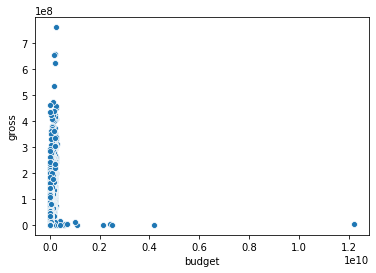

In [35]:
##Parte 2
import seaborn as sns
budget_gross = imdb[["budget","gross"]].dropna()
sns.scatterplot(x="budget",y="gross", data =budget_gross)

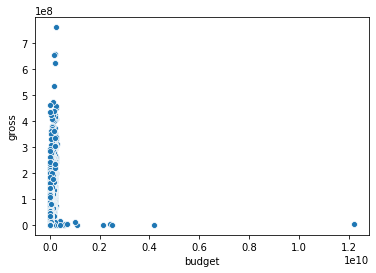

In [36]:
##Pelo gráfico podemos perceber alguns pontos fora da curva ou valores "suspeitos"
##Logo vamos tirar esses valores do gráfico
budget_gross = imdb[["budget","gross"]].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(x="budget",y="gross", data =budget_gross)

In [40]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [41]:
##Pode-se verificar que os valores "estranhos" tem a ver com moeda usada nos numéros de maior orçamento
##Parte 1 - Verificar a quantidade de paises

imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [44]:
##Parte 2 - Filtrar por mercado no caso EUA

imdb_usa = imdb.query("country =='USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [0]:
##Remove duplicados
imdb = imdb.drop_duplicates()


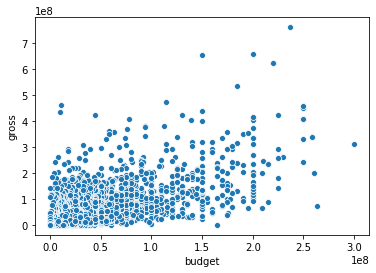

In [50]:
##Plotar o grafico para verificar agora que os dados estão "limpos"
budget_gross = imdb_usa[["budget","gross"]].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(x="budget", y ="gross", data = budget_gross)

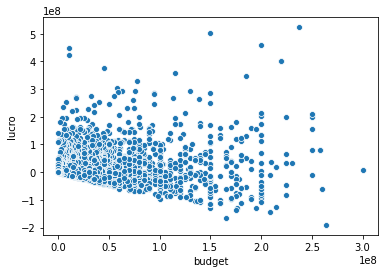

In [52]:
##Explorando lucro/prejuizo
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget","lucro"]].dropna()
sns.scatterplot(x="budget", y ="lucro", data = budget_gross)

Desafio 1 : 

- Descobrir o filme que teve gastos e levou bastante prejuizo próximo ao ponto 2,5.

- Filmes mais recentes tem maior prejuizo?





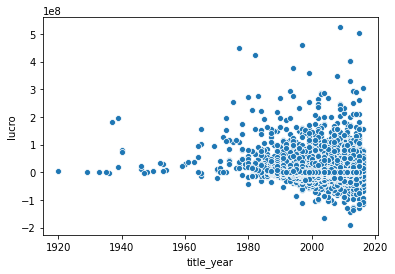

In [53]:
##Prejuizo por ano

budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["title_year","lucro"]].dropna()
sns.scatterplot(x="title_year", y ="lucro", data = budget_gross)


Desafio 2:
- Filmes da pré guerra

Desafio prático : Descobrir a relacao entre diretores e faturamento


In [60]:
##Passo 1 : Filtrar por diretores
filmes_pdiretor = imdb_usa['director_name'].value_counts()
filmes_pdiretor.head()

Steven Spielberg    24
Martin Scorsese     20
Clint Eastwood      20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [62]:
##Passo 2 : 
##Relacionar colunas de diretores com faturamento 1 linha,colocou o index pq director_name existe na ds e df
##Renomear as colunas
##Resetar o indice para adequar as colunas
gross_director = imdb_usa[["director_name","gross"]].set_index("director_name").join(filmes_pdiretor, on="director_name")
gross_director.columns=["dinheiro","filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dinheiro,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


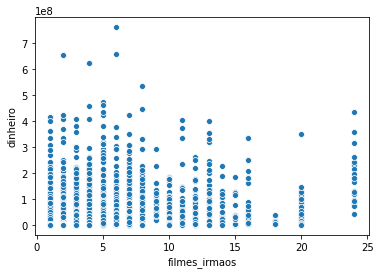

In [63]:
#Plotar o gráfico

sns.scatterplot(x="filmes_irmaos", y ="dinheiro", data = gross_director)


Desafio 4 : Verificar se o 18 é Woody Allen.


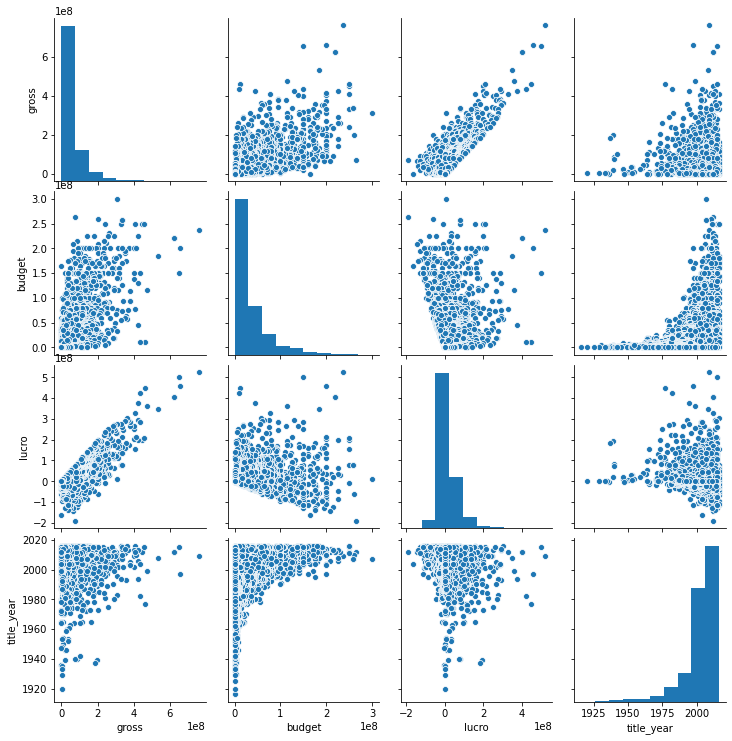

In [65]:
sns.pairplot(data = imdb_usa[["gross","budget","lucro","title_year"]])

In [66]:
##Encontrar correlação

imdb_usa[["gross","budget","lucro","title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


In [0]:
##Leitura quando o faturamento aumenta o lucro aumenta gross x lucro
##Quanto maior o ano, menor o lucro : title_year x lucro

##Desafios

- Encontrar correlação de filmes a partir de 2000
- Ajustar retas
-Número de avaliações por ano